Video: https://www.youtube.com/watch?v=P6kSc3qVph0&t=61s
        
Documentación: https://scikit-learn.org/stable/

Mapa de algoritmos de SKLEARN https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

Hacer Machine Learning con SKLEARN es extremádamente simple. Todos los modelos y algoritmos de machine learning están implementados en la arquitectura orientada a objetos en la que cada modelo dispone de su propia clase. 

El esquema sobre el que se trabaja es: 

- seleccionar un estimador y unos hiperparámetros

model =  Estimador (h1, h2,... , hn)

- entrenar el modelo con los datos de la tabla X y el vector y

model.fit(X,y)

- evaluar el modelos

model.score(X,y)

- usar el modelos

model.predict(X,y)

# modelo de regresión lineal

In [1]:
import numpy as np
import matplotlib.pyplot as plt

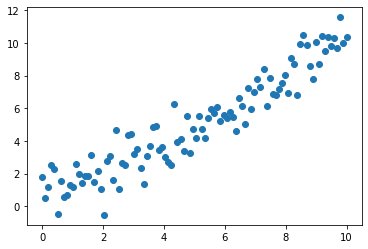

In [2]:
np.random.seed(0)
m = 100
X = np.linspace(0,10,m).reshape(m,1) #reshape hace que sea una matriz de dos dimensiones
y = X + np.random.randn(m,1)

plt.scatter(X,y)
plt.show()

In [3]:
# importamos sklearn y el modelo que vamos a usar
from sklearn.linear_model import LinearRegression

In [4]:
model = LinearRegression()
model.fit(X,y)
model.score(X,y)
prediction = model.predict(X)

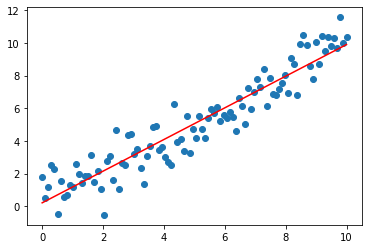

In [5]:
plt.scatter(X,y)
plt.plot(X, prediction, c='r')
plt.show()

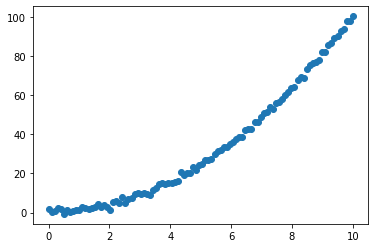

In [6]:
# imaginemos un modelo diferente
np.random.seed(0)
m = 100
X = np.linspace(0,10,m).reshape(m,1) 
y = X**2 + np.random.randn(m,1) #hemos elevado la X**2

plt.scatter(X,y)
plt.show()

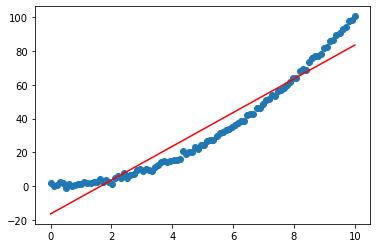

In [7]:
model = LinearRegression()
model.fit(X,y)
model.score(X,y)
prediction = model.predict(X)
plt.scatter(X,y)
plt.plot(X, prediction, c='r')
plt.show()

El resultado ahora no se ajusta tan bien a la curva como antes. Esto se debe a que 

In [8]:
# importamos el método que nos va resolver la papeleta
from sklearn.svm import SVR

C:\Users\Adarax\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


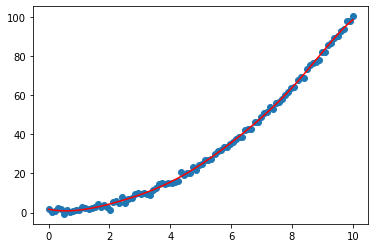

In [9]:
model = SVR(C=100)
model.fit(X,y)
model.score(X,y)
prediction = model.predict(X)
plt.scatter(X,y)
plt.plot(X, prediction, c='r')
plt.show()

# Clasificación KNN

In [10]:
import pandas as pd
import seaborn as sns

In [11]:
# Cargamos el dataset de titanic
titanic = sns.load_dataset('titanic')
titanic.shape
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
# filtramos los datos
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)

# reemplazamos los valores hombre y mujer por valores numéricos 
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [13]:
# cargamos el método que vamos a usar

from sklearn.neighbors import KNeighborsClassifier

In [14]:
model = KNeighborsClassifier()

In [15]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)

In [16]:
model.fit(X,y)
model.score(X,y) # no es un modelo perfecto y no puede salir 1.0

0.8319327731092437

In [17]:
# aquí vemos quienes viven y quienes mieren
model.predict(X)

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,

In [18]:
# creamos una función sobrevivir

def sobrevivir(model, pclass=3, sex=0, age=30):
    x = np.array([pclass, sex, age]).reshape(1,3)
    print(model.predict(x))
    print(model.predict_proba(x)) # calcular la probabilidad de cada variable

In [19]:
# sobrebiviremos?
sobrevivir(model)

[0]
[[0.8 0.2]]


Practica:

Cambiar el hiperparámentro n_neighbors del método de clasificación para buscar el mejor resultado entre 0-10

    model = KNeighborsClassifier(n_neighbors=?) 

In [66]:
score = []

for i in range(1,10):
    model = KNeighborsClassifier(n_neighbors=i)
    y = titanic['survived']
    X = titanic.drop('survived', axis=1)
    model.fit(X,y)
    score.append(model.score(X,y))

In [67]:
score

[0.8473389355742297,
 0.8585434173669467,
 0.8585434173669467,
 0.8403361344537815,
 0.8319327731092437,
 0.8221288515406162,
 0.8207282913165266,
 0.8109243697478992,
 0.8179271708683473]

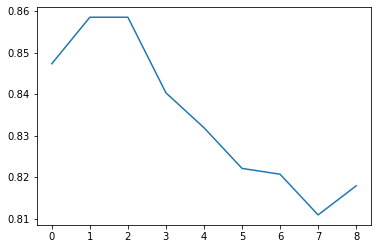

In [68]:
plt.plot(score)
plt.show()

In [69]:
print("Mejor rendimiento: ", max(score))
print('Posición en el array: ', score.index(max(score)))

Mejor rendimiento:  0.8585434173669467
Posición en el array:  1


## Model Selection

Video: https://www.youtube.com/watch?v=w_bLGK4Pteo&t=96s

Documentacion: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

En machine learning nunca se evalúa el rendimiento de un modelo con los datos de entrenamiento. Para testar el modelo tenemos que usar datos que nunca haya visto. 

Cuando hacemos machine learning dividimos los datos en dos partes: una parte para el entrenamiento y otra para el testeo. Estos los llamaremos a partir de ahora Train set y Test set respectivamente.
Para esto aplicaremos la regla de Pareto y haremos un 80% / 20% con los datos Train/Test

Dicho de otro modo con lo que llevamos visto, tendremos:

model.fit(X_train, y_train)

model.score(X_test, y_test)

Para hacer todo esto usamos la función "model_selection.train_test_split"

In [23]:
# importamos un data set
from sklearn.datasets import load_iris

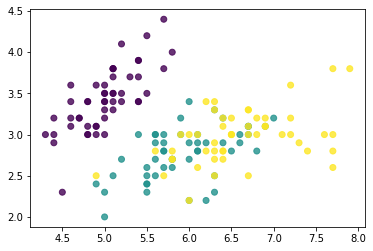

In [24]:
iris = load_iris()

X = iris.data
y = iris.target

plt.scatter(X[:, 0], X[:,1], c=y, alpha=0.8)
plt.show()

In [25]:
X.shape

(150, 4)

Podemos ver que contamos con 150 muestras que vamos a dividir para tomar una parte de entrenamiento y otra de test

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# creamos las colecciones de datos y definimos el tamaño de cada una

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

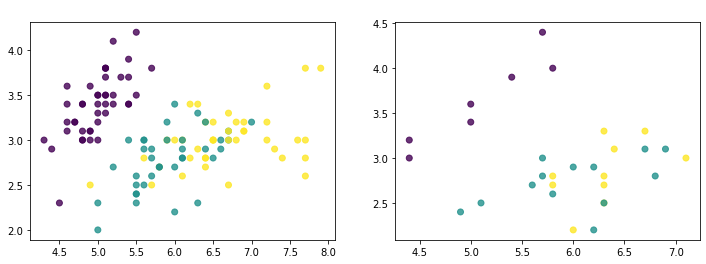

In [28]:
# si visualizamos los datos gráficamente
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.8)
plt.title('TRAIN Set', c='w')

plt.subplot(122)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.8)
plt.title('TEST Set', c='w')

plt.show()

Cuando usamos el método train_set_split los datos se escogen de forma aleatoria. Podemos controlar la selección estableciendo un valor para el parámetro "random_state"

In [29]:
# establecemos un valor de 5 para el parámetro

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)

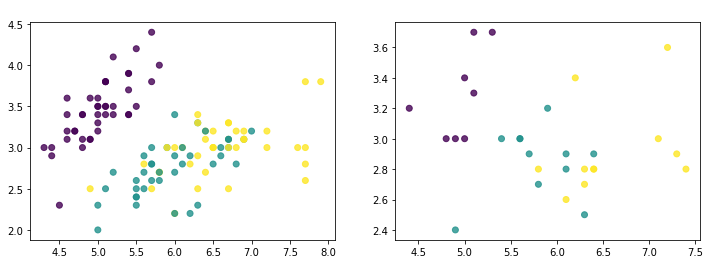

In [30]:
# si visualizamos los datos gráficamente
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.8)
plt.title('TRAIN Set', c='w')

plt.subplot(122)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.8)
plt.title('TEST Set', c='w')

plt.show()

In [31]:
# Pasamos a entrenar el modelo

from sklearn.neighbors import KNeighborsClassifier

In [32]:
model = KNeighborsClassifier(n_neighbors=1)

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [33]:
# si usamos los datos de entrenamiento para la predicción nos devuelve un resultado de 1
model.score(X_train, y_train)

1.0

In [34]:
 # Cuando le entregamos los datos de test el resultado ya cambia
model.score(X_test, y_test)

0.9

## Cross-Validation

Con esto ya sabemos como entrenar y testar un modelo de machine learning. En la tarea como científico de datos el trabajo consiste en mejorar el rendimiento del modelo para que su resultado a la hora de darle datos de testeo nos devuelva un 99'99% de acierto.

In [35]:
# si cambiamos el número de vecinos lo podemos comprobar

model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train)
print ('Con n_neighbors=3')
print ('Train score: ', model.score(X_train, y_train))
print ('Test score: ', model.score(X_test, y_test))

model = KNeighborsClassifier(n_neighbors=6)

model.fit(X_train, y_train)
print ('Con n_neighbors=6')
print ('Train score: ', model.score(X_train, y_train))
print ('Test score: ', model.score(X_test, y_test))

Con n_neighbors=3
Train score:  0.975
Test score:  0.9333333333333333
Con n_neighbors=6
Train score:  0.9833333333333333
Test score:  0.9666666666666667


Para realizar esta mejora necesitamos una tercera partición de nuestro data set y le vamos a llamar "Validation set". Esta partición es una porción del grupo de datos de entrenamiento. 

Por ejemplo, cuando queremos comprar dos modelos de machine learning como antes, podemos jugar con el valor de "n_neighbors" para cada modelo. Les damos los datos de entrenamiento, luego seleccionaremos el que nos dé el mejor rendimiento con los datos de validación y le aplicaremos los datos de testado para valorar el rendimiento que ofrece. 

Para tomar una buena decisión entre los dos modelos usamos el método de cross-validation. Este método consiste en entrenar y después validar nuestro modelo mediante nuestro train set, realizando todas las configuraciones posibles. 

In [36]:
# importamos la función necesaria para esto

from sklearn.model_selection import cross_val_score

In [37]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy')

# con el parámetro cv controlamos el número de cortes

array([1.        , 1.        , 1.        , 0.95833333, 0.95833333])

In [38]:
# podemos hacer la media de todos los cortes
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy').mean()

0.9833333333333334

In [39]:
# controlar el número de KNN

cross_val_score(KNeighborsClassifier(2), X_train, y_train, cv=5, scoring='accuracy').mean()

0.9666666666666668

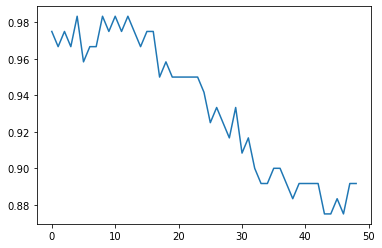

In [40]:
# podemos usar un bucle para probar todos los valores de vecinos que queramos

val_score = []

for k in range(1,50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)
   

plt.plot(val_score) #mostramos todos los datos de la lista val_score[]
plt.show()

Por suerte está todo pensado y hay una función de sklearn que puede hacer todo esto por tí y ahorrarte el trabajo de hacer un bucle y mostrar datos. Hablamos de la función "validation_curve"

In [41]:
# importamos la función

from sklearn.model_selection import validation_curve

In [42]:
model = KNeighborsClassifier()  # modelo seleccionado
k = np.arange(1, 50)             # iterador 

train_score, val_score = validation_curve(model, X_train, y_train, 'n_neighbors', k, cv=5)

val_score.mean(axis=1)

C:\Users\Adarax\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([0.975     , 0.96666667, 0.975     , 0.96666667, 0.98333333,
       0.95833333, 0.96666667, 0.96666667, 0.98333333, 0.975     ,
       0.98333333, 0.975     , 0.98333333, 0.975     , 0.96666667,
       0.975     , 0.975     , 0.95      , 0.95833333, 0.95      ,
       0.95      , 0.95      , 0.95      , 0.95      , 0.94166667,
       0.925     , 0.93333333, 0.925     , 0.91666667, 0.93333333,
       0.90833333, 0.91666667, 0.9       , 0.89166667, 0.89166667,
       0.9       , 0.9       , 0.89166667, 0.88333333, 0.89166667,
       0.89166667, 0.89166667, 0.89166667, 0.875     , 0.875     ,
       0.88333333, 0.875     , 0.89166667, 0.89166667])

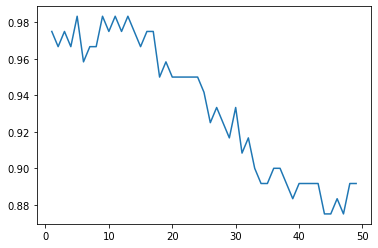

In [43]:
plt.plot(k, val_score.mean(axis=1))
plt.show()

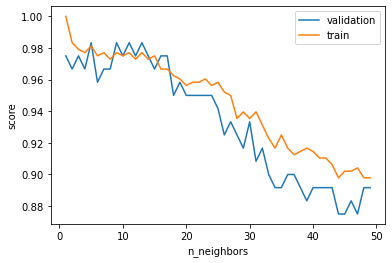

In [44]:
# podemos también comprobar todo esto sobre nuestro trains set

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

Podemos conseguir un mejor rendiemiento usando otros modelos e hiperparámetros. Hay muchos, pero para examinar todas las combinaciones posibles es mejor utilizar GridSearchCV

### GridSearchCV

esta función nos permite encontrar el modelo con los mejores hiperparámetros comparando los rendimientos de cada combinación. 

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = {'n_neighbors' : np.arange(1,20),
             'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

In [47]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [48]:
grid.best_score_

0.9833333333333334

In [49]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [50]:
model = grid.best_estimator_

In [51]:
model.score(X_test, y_test)

0.9333333333333333

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix(y_test, model.predict(X_test))

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]], dtype=int64)

## Curva de aprendizaje

La curva de aprendizaje muestra la evolución del rendimiento del modelo en función de la cantidad de datos que le damos. Normalmente cuantos más datos tenga el modelo para entrenar mejor será su rendimiento, pero la curva no crece de forma infinta, tiene una asintota en el 100% de rendimiento y nuestro trabajo será optimizar los datos para acercarnos lo máximo a esa asíntota lo antes posible.

Para esto usamos la funció learning_curve

In [54]:
from sklearn.model_selection import learning_curve

In [55]:
N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                           train_sizes = np.linspace(0.1,1.0,10))

In [56]:
print(N)

[ 9 19 28 38 48 57 67 76 86 96]


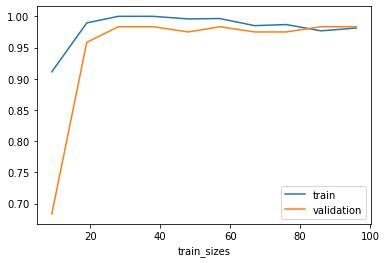

In [57]:
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
plt.show()